In [61]:
import numpy as np

from qiskit import QuantumCircuit, Aer, execute
# from qiskit import *

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.rz(np.pi/2, 1)

backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j    0.   +0.j    0.   +0.j    0.   +0.707j]


In [70]:
J_4 = QuantumCircuit(4)
J_4.h(0)
J_4.cx(0,1)
J_4.cx(0,2)
J_4.cx(0,3)
J_4.rz(np.pi/2, 3)

backend = Aer.get_backend('statevector_simulator')
job = execute(J_4, backend)
result = job.result()
outputstate = result.get_statevector(J_4, decimals=3)
print(outputstate)

[0.707+0.j    0.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j
 0.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j
 0.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j    0.   +0.j
 0.   +0.707j]


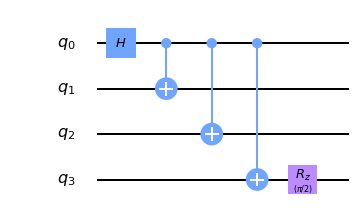

In [66]:
J_4.draw(output='mpl')

[[ 0.69351992-0.13794969j  0.13794969+0.69351992j]
 [-0.13794969+0.69351992j  0.69351992+0.13794969j]]


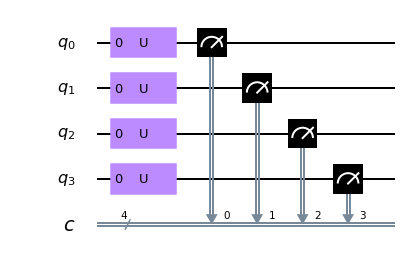

In [72]:
# computing optimal quantum strategy in unitary matrix form

# defining pauli operators
I = np.matrix('1 0; 0 1') 
X = np.matrix('0 1; 1 0')
Y = np.matrix('0 -1j; 1j 0')
Z = np.matrix('1 0; 0 -1')


import math
a = (1/math.sqrt(2))*math.cos(math.pi/16)*(I+1j*X)+(1/math.sqrt(2))*math.sin(math.pi/16)*(1j*Y-1j*Z)
print (a)
op = Operator(a)        

num_qubits = 4
num_cbits = num_qubits
circ = QuantumCircuit(num_qubits, num_cbits)
circ.append(op, [0])
circ.append(op, [1])
circ.append(op, [2])
circ.append(op, [3])
#for gate, qubits in [gate1, gate2]:
#    circ.append(gate, qubits)
circ.measure(range(num_qubits), range(num_cbits))
circ.draw(output='mpl')